##Dataset


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
X = df.values

##Escalamiento

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Example: Keeping 2 principal components

# Fit the PCA model to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Print the reduced-dimensionality data


In [ ]:
new_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
new_df.head()

,PC1,PC2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def graficar(new_df):

  columns_to_plot = new_df.columns[new_df.columns != 'Cluster']

  # Create a color palette for clusters
  num_clusters = len(new_df['Cluster'].unique())
  palette = sns.color_palette('hls', n_colors=num_clusters)

  # Create scatter plots for all column pairs
  sns.pairplot(new_df, hue='Cluster', vars=columns_to_plot, palette=palette, diag_kind='kde')
  plt.show()

#KMeans

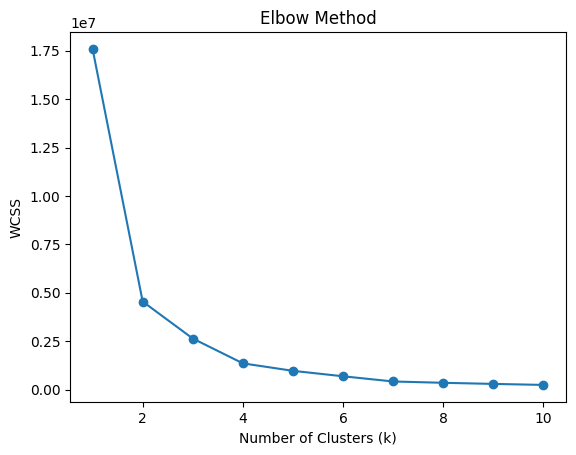

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def elbow_method(X, max_clusters=10):
    """Applies the Elbow method to find the optimal number of clusters."""
    wcss = []  # Within-cluster sum of squares
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the WCSS values
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()


# Assuming you have your data in 'X' (e.g., from previous examples)
# X = ...

elbow_method(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = kmeans.labels_

In [ ]:
new_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
new_df['Cluster'] = labels
new_df.head()



,PC1,PC2,Cluster
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,2
3,3.757066,2.756372,2
4,1.008908,0.869831,1


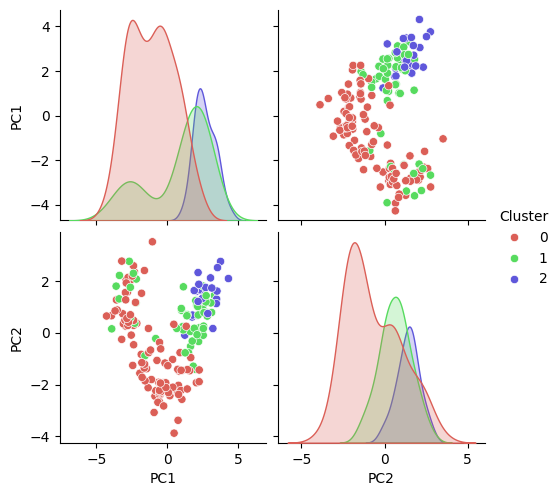

In [ ]:
graficar(new_df)

#DBSCAN


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN


# Create a DBSCAN object and fit it to the data
clustering = DBSCAN().fit(X_pca)

# Get the cluster labels
labels = clustering.labels_

# Print the cluster labels
print(labels)  # Execute the code yourself to see the output

[ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0  2  1  1 -1 -1  2  0 -1  2 -1  0  1  0
 -1  0  0  2  2  1  0 -1 -1  0  2  3  0  2  2  2  1  2  1  1  1  2  2  0
 -1  2  0  2  2  2 -1  2  2  1  2  1  2  0  0  2  1  2  2 -1  2  2 -1  2
  0  0  1 -1  0  2 -1  1  2  1 -1  3  3  3  3  3 -1  3  3  3  3  3  3  3
 -1  3 -1  3  4  4  4  4 -1  4  3 -1  4  3 -1 -1  3 -1  3  3  4  3  4  4
  4  4 -1  3  4 -1  4  4  4 -1]


In [ ]:
new_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
new_df['Cluster'] = labels
new_df.head()

,PC1,PC2,Cluster
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,-1
4,1.008908,0.869831,0


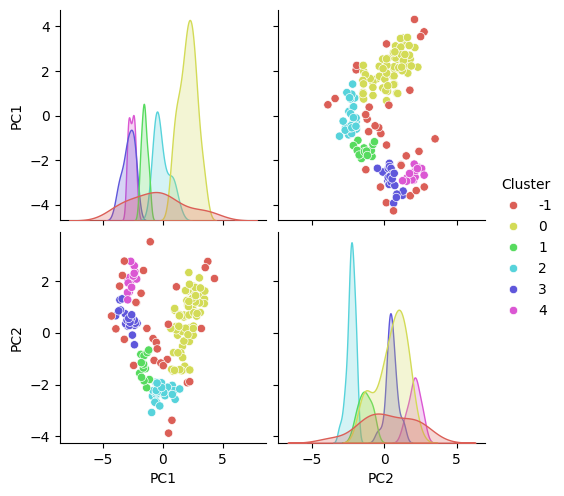

In [ ]:
graficar(new_df)

#Mean shift

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
# Create a MeanShift object
clustering = MeanShift(bandwidth=2).fit(X_pca)

# Get cluster labels and cluster centers
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

In [ ]:
new_df['Cluster'] = labels
new_df.head()

,PC1,PC2,Cluster
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1


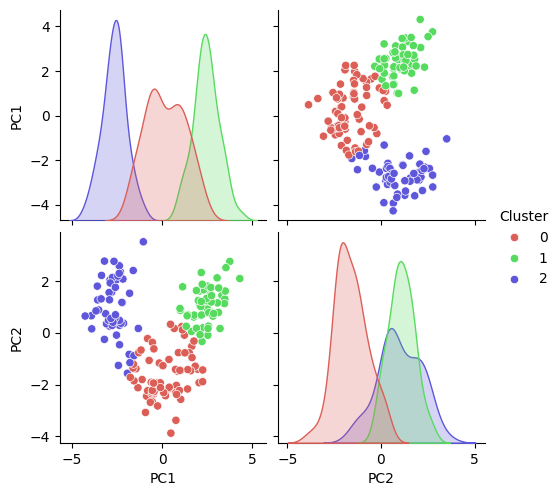

In [ ]:
graficar(new_df)

#Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture

# Create a GaussianMixture object and fit it to the data
gmm = GaussianMixture(n_components=2).fit(X_pca)

# Get the cluster labels
labels = gmm.predict(X_pca)




In [ ]:
new_df['Cluster'] = labels
new_df.head()

,PC1,PC2,Cluster
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0


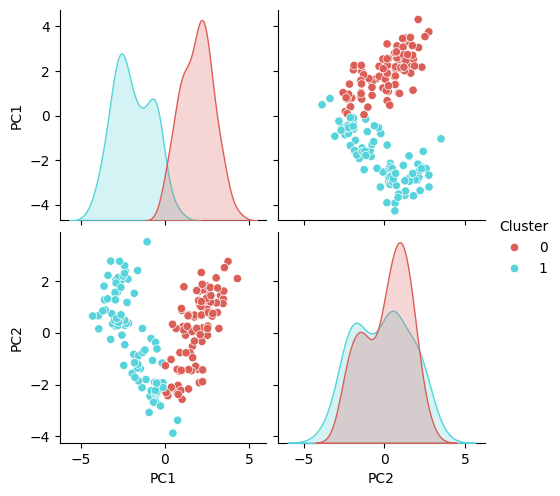

In [ ]:
graficar(new_df)

TAREA
- Utilizar dataset iris
- Analísis de Componentes Principales
- Agrupar con Mean Shift
- Agrupar con Gaussian Mixture
- Graficar

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = iris_df.values

In [ ]:
pca = PCA(n_components=2)  # Example: Keeping 2 principal components

# Fit the PCA model to the scaled data
X_pca = pca.fit_transform(X)

In [ ]:
clustering = MeanShift(bandwidth=2).fit(X_pca)

# Get cluster labels and cluster centers
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

In [ ]:
new_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
new_df['Cluster'] = labels
new_df.head()

,PC1,PC2,Cluster
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1


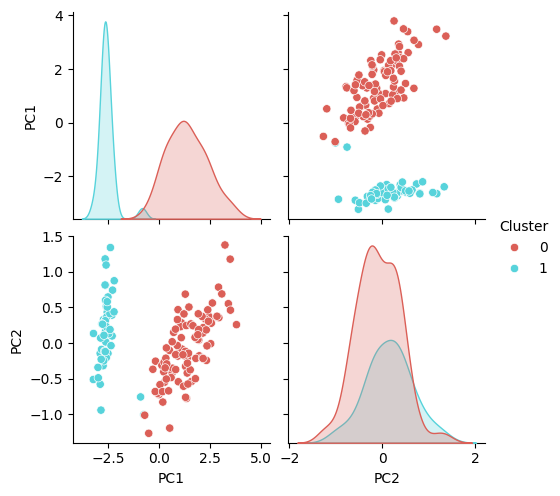

In [ ]:
graficar(new_df=new_df)

In [ ]:
# Create a GaussianMixture object and fit it to the data
gmm = GaussianMixture(n_components=2).fit(X_pca)

# Get the cluster labels
labels = gmm.predict(X_pca)


In [ ]:
new_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
new_df['Cluster'] = labels
new_df.head()

,PC1,PC2,Cluster
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1


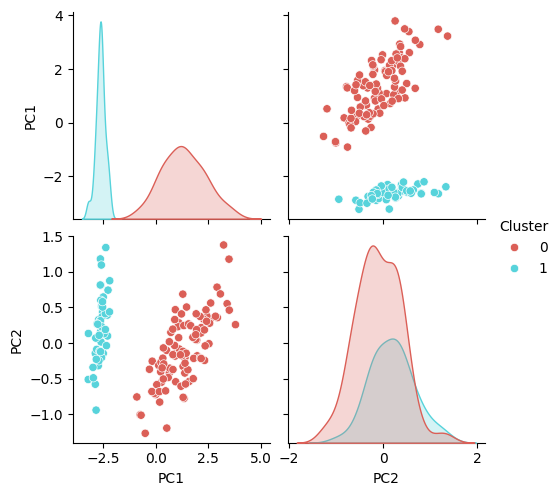

In [ ]:
graficar(new_df)